## Advanced models - Full image binary classes
This notebook is training and testing our model(s) using the full images and for classifying 2 classes `['Normal/Healthy','SICK']`.

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

## Loading packages and dependencies

In [ ]:
from src.preprocessing.image_augmentor import load_dataset_images
from src.models.build_model import train_advanced_supervised_model, evaluate_model
from src.visualization.visualize import show_grad_cam_cnn, get_predication_output,show_loss_accuracy_report, show_confusion_matrix_report

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/binary/images'
store_images_dir = '../reports/images/grad_cam'
IMG_SIZE = 299  # Resize images to IMG_SIZExIMG_SIZE pixels
batch_size = 32

## Extracting features from images

In [ ]:
train_data, val_data, class_weight_dict = load_dataset_images(raw_data_dir, (IMG_SIZE, IMG_SIZE), batch_size)


Found 16933 images belonging to 2 classes.
Found 4232 images belonging to 2 classes.
Computed Class Weights:{0: 1.0383247485896492, 1: 0.9644036906253559} labels: {'Normal': 0, 'Sick': 1}


## Training and evaluating models

### Convolutional Neural Networks (CNN)

✅ Strengths:
* Highly accurate for image tasks.
* Learns complex patterns automatically.
* Works well with large image datasets.

❌ Weaknesses:
* Computationally expensive (needs GPUs).
* Requires large labeled datasets.
* Not easily interpretable.

In [ ]:
cnn_model, cnn_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 2, 
                                                         class_weight_dict, model_type='CNN', 
                                                         classification_type='binary')

2025-04-14 08:00:39.983978: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-14 08:00:39.984005: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-04-14 08:00:39.984009: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-04-14 08:00:39.984031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-14 08:00:39.984040: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 299, 299, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             

 Total params: 19,446,978 (74.18 MB)

 Trainable params: 19,439,042 (74.15 MB)

 Non-trainable params: 7,936 (31.00 KB)

/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-04-14 08:00:42.977517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


530/530 ━━━━━━━━━━━━━━━━━━━━ 281s 516ms/step - accuracy: 0.6161 - loss: 20.2455 - val_accuracy: 0.5123 - val_loss: 2837.5417 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 320s 603ms/step - accuracy: 0.6274 - loss: 1388.4095 - val_accuracy: 0.6063 - val_loss: 8230.0020 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 298s 561ms/step - accuracy: 0.6271 - loss: 35491.9883 - val_accuracy: 0.4913 - val_loss: 80983.4766 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 304s 574ms/step - accuracy: 0.6364 - loss: 241873.0938 - val_accuracy: 0.7264 - val_loss: 129419.1641 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 305s 575ms/step - accuracy: 0.6408 - loss: 699125.9375 - val_accuracy: 0.7016 - val_loss: 282996.4062 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.6567 - loss: 1447401.1250
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
53

In [ ]:
cnn_train_loss, cnn_train_acc = cnn_history.history['loss'][-1], cnn_history.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc:.4f}, Train Loss: {cnn_train_loss:.4f}")

cnn_test_loss, cnn_test_acc = evaluate_model("Binary classification [Normal, Others] for images without masks", 
                                             cnn_model, val_data, _, model_type="CNN", 
                                             classification_type="binary", history=cnn_history)
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")


Train Accuracy: 0.6612, Train Loss: 1697132.3750
133/133 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.5058 - loss: 2899.2705
133/133 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step


2025/04/14 08:31:18 INFO mlflow.tracking.fluent: Experiment with name 'Advanced Supervised Models' does not exist. Creating a new experiment.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Successfully registered model 'tensorflow-CNN-binary'.
2025/04/14 08:31:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-binary, version 1


🏃 View run CNN-binary at: http://localhost:8080/#/experiments/256036775927951482/runs/275c4b0306d7495483ab7b1b4dfa9bfa
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.5123, Test Loss: 2837.5422


Created version '1' of model 'tensorflow-CNN-binary'.


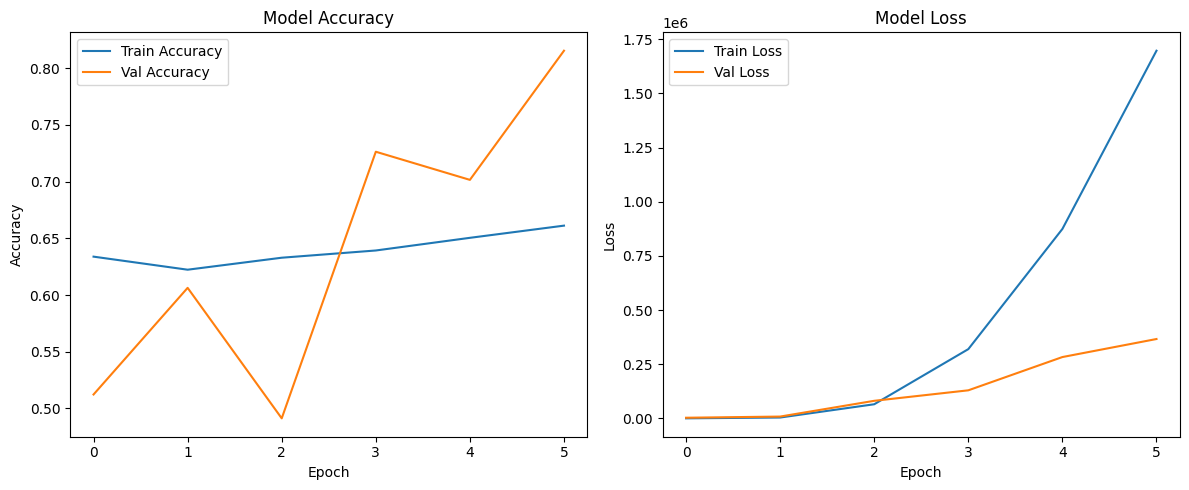

In [7]:
show_loss_accuracy_report(cnn_history)

In [19]:
show_confusion_matrix_report(cnn_model, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step
[[ 660 1378]
 [ 706 1488]]
              precision    recall  f1-score   support

           0       0.48      0.32      0.39      2038
           1       0.52      0.68      0.59      2194

    accuracy                           0.51      4232
   macro avg       0.50      0.50      0.49      4232
weighted avg       0.50      0.51      0.49      4232



In [8]:
class_names = list(val_data.class_indices.keys())
images, labels = next(val_data)

Model interpretation with GradCam for random validation images is saved to `reports/images/grad_cam`.

In [9]:
show_grad_cam_cnn(images[:4], cnn_model, class_names, labels, save_dir=store_images_dir, image_name="3.1_cnn", save_image=True)

Show prediction results for random images.

In [10]:
display(get_predication_output(images[:4], cnn_model, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,image,confidence,predicted_class,actual_class
0,0,100.0,Sick,Sick
1,1,100.0,Sick,Normal
2,2,100.0,Sick,Sick
3,3,100.0,Sick,Sick


### Transfer learning

✅ Strengths
* Transfer learning reduces training time while maintaining high accuracy.
* Fine-tuning improves performance when sufficient data is available.
* Combining deep features with statistical features can enhance results.

In [ ]:
trl_model, trl_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 2, 
                                                         class_weight_dict, model_type="Transfer Learning", 
                                                         classification_type='binary')

Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 299, 299,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 299, 299,  │          7 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 299, 299,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_2[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        512 │ block1a_se_excit

 Total params: 4,213,797 (16.07 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 68s 121ms/step - accuracy: 0.7422 - loss: 0.5418 - val_accuracy: 0.7954 - val_loss: 0.4352 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 56s 106ms/step - accuracy: 0.8553 - loss: 0.3667 - val_accuracy: 0.8247 - val_loss: 0.3878 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - accuracy: 0.8747 - loss: 0.3277 - val_accuracy: 0.8396 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 55s 104ms/step - accuracy: 0.8767 - loss: 0.3119 - val_accuracy: 0.8443 - val_loss: 0.3441 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 55s 104ms/step - accuracy: 0.8823 - loss: 0.2941 - val_accuracy: 0.8523 - val_loss: 0.3370 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 57s 108ms/step - accuracy: 0.8860 - loss: 0.2943 - val_accuracy: 0.8587 - val_loss: 0.3269 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 60s 11

In [ ]:
trl_train_loss, trl_train_acc = trl_history.history['loss'][-1], trl_history.history['accuracy'][-1]
print(f"Train Accuracy: {trl_train_acc:.4f}, Train Loss: {trl_train_loss:.4f}")

trl_test_loss, trl_test_acc = evaluate_model("Binary classification [Normal, Others] for images without masks", 
                                             trl_model, val_data, _, model_type="Transfer Learning", 
                                             classification_type="binary", history=trl_history)
print(f"Test Accuracy: {trl_test_acc:.4f}, Test Loss: {trl_test_loss:.4f}")

Train Accuracy: 0.9047, Train Loss: 0.2484
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.8843 - loss: 0.2830
133/133 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Successfully registered model 'tensorflow-Transfer Learning-binary'.
2025/04/14 08:50:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-Transfer Learning-binary, version 1


🏃 View run Transfer Learning-binary at: http://localhost:8080/#/experiments/256036775927951482/runs/35619dc4ce9a47c1a7f378e6e73e9298
🧪 View experiment at: http://localhost:8080/#/experiments/256036775927951482
Test Accuracy: 0.8752, Test Loss: 0.2964


Created version '1' of model 'tensorflow-Transfer Learning-binary'.


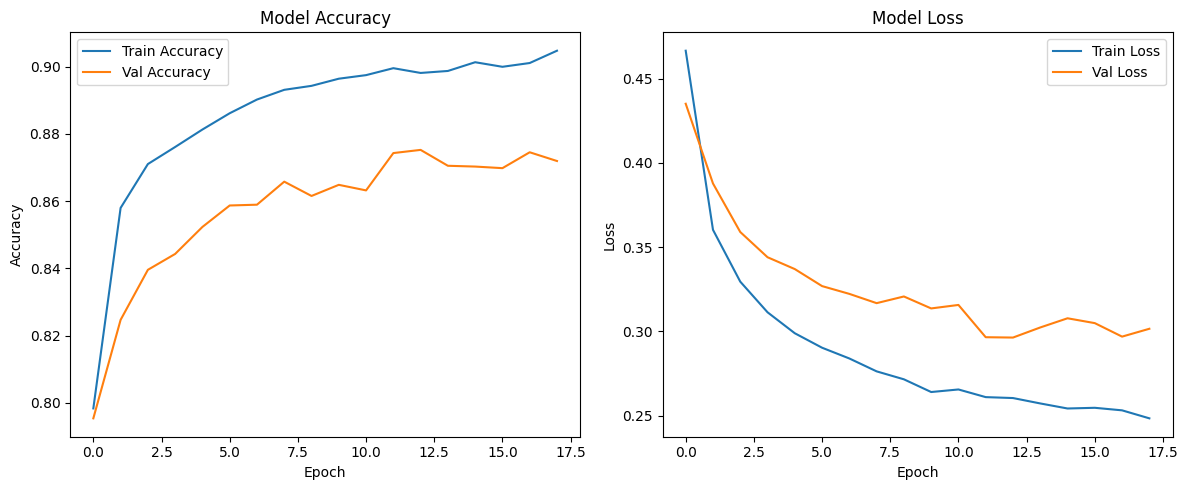

In [13]:
show_loss_accuracy_report(trl_history)

In [20]:
show_confusion_matrix_report(trl_model, val_data)

133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step
[[1072  966]
 [1150 1044]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50      2038
           1       0.52      0.48      0.50      2194

    accuracy                           0.50      4232
   macro avg       0.50      0.50      0.50      4232
weighted avg       0.50      0.50      0.50      4232



Model interpretation with GradCam for random validation images is saved to `reports/images/grad_cam`.

In [ ]:
show_grad_cam_cnn(images[:4], trl_model, class_names, labels, save_dir=store_images_dir, 
                  image_name="3.1_trl-imagenet", save_image=True)

Show prediction results for random images.

In [16]:
display(get_predication_output(images[:4], trl_model, class_names, labels).head(10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,image,confidence,predicted_class,actual_class
0,0,97.076350,Sick,Sick
1,1,98.787957,Normal,Normal
2,2,64.287668,Normal,Sick
3,3,99.026847,Sick,Sick
